Heatmap
==

In [2]:
data_files = []
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/ink_v_ink/ink_v_ink_log_1e-05_tus.csv')
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/paper_v_paper/paper_v_paper_log_1e-05_tus.csv')
data_files.append('/home/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv')

In [6]:
import csv
data = {}
heads = {}
for fi in data_files:
    with open(fi,'r') as f:
        reader = csv.reader(f)
        heads[fi] = reader.next()
        data[fi] = {}
        for row in reader:
            data[fi][row[0]]=row

In [88]:
import numpy as np
found = []
plot_data = []
for fi in data:
    for mz,row in data[fi].items():
        if float(row[-1]) <= 0.05 and not mz in found:
            plot_data.append(data['/home/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv'][mz][1:-3])
            found.append(mz)
new_plot = []
for row in plot_data:
    new_row = []
    for r in row:
        if not r == 'nan':
            new_row.append(float(r))
        else:
            new_row.append(0.0)
    mnr = max(new_row)
    new_row = [m/mnr for m in new_row]
    new_plot.append(new_row)
new_plot = np.array(new_plot)

In [89]:
import pylab as plt
%matplotlib inline

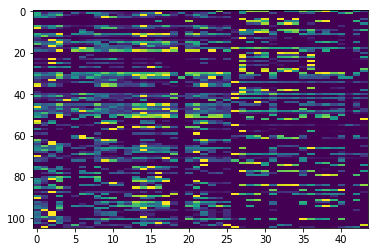

In [90]:
plt.imshow(new_plot,aspect = 'auto')

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
ac = AgglomerativeClustering(n_clusters = 5)
ac.fit(new_plot)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7f04bc14c500>)

105


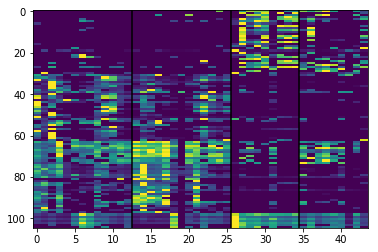

In [93]:
print len(found)
ar = zip(list(ac.labels_),range(len(ac.labels_)))
ar = sorted(ar,key = lambda x: x[0])
_,s_index = zip(*ar)
plt.imshow(new_plot[s_index,:],aspect='auto')
plt.plot([12.5,12.5],[-0.5,104.5],'k')
plt.plot([25.5,25.5],[-0.5,104.5],'k')
plt.plot([34.5,34.5],[-0.5,104.5],'k')
plt.savefig('heatplotexample.png')